In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Create features
data['Returns'] = data['Close'].pct_change()
data['SMA'] = data['Close'].rolling(window=20).mean()
data['StdDev'] = data['Close'].rolling(window=20).std()
data = data.dropna()

# Define the target
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# Define features and target
features = ['Returns', 'SMA', 'StdDev']
X = data[features]
y = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict signals
data['Signal'] = model.predict(X)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == 0]
plt.plot(buy_signals.index, buy_signals['Close'], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(sell_signals.index, sell_signals['Close'], 'v', markersize=10, color='r', label='Sell Signal')
plt.title(f'{symbol} - ML-Based Mean Reversion')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\ayman\AppData\Local\Temp\ipykernel_6608\3159605447.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
C:\Users\ayman\AppData\Local\Temp\ipykernel_6608\3159605447.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'] = model.predict(X)
C:\Users\ayman\AppData\Local\Temp\ipykernel_6608\3159605447.py:37: SettingWithCopyWarning: 
A value is trying to

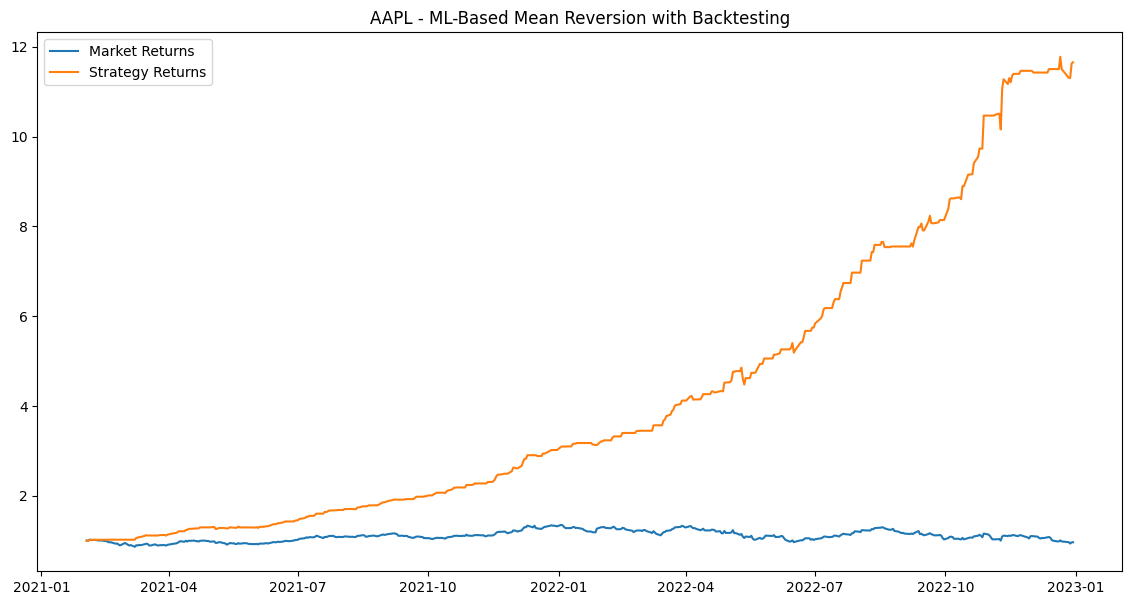

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2021-01-01', end='2023-01-01')

# Create features
data['Returns'] = data['Close'].pct_change()
data['SMA'] = data['Close'].rolling(window=20).mean()
data['StdDev'] = data['Close'].rolling(window=20).std()
data = data.dropna()

# Define the target
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# Define features and target
features = ['Returns', 'SMA', 'StdDev']
X = data[features]
y = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict signals
data['Signal'] = model.predict(X)

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title(f'{symbol} - ML-Based Mean Reversion with Backtesting')
plt.legend()
plt.show()
